In [2]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune

from functions.train_test import train, test,train_kd
from functions.data_loader import get_data_loader,load_checkpoint
from models.vit import ViT 
from functions.helpers import count_parameters


In [3]:
torch.manual_seed(42)

In [4]:
train_loader, test_loader = get_data_loader(
    80, 2, "datasets/cifar-10/cifar-10-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


Teacher - base model


In [5]:
teacher_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=6,
    heads=12,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False
).to("cuda")

teacher_save_path = "save_model/cifar-10/vit_base"
teacher_load_path = f"{teacher_save_path}/best_model.pt"

In [6]:
train(
    teacher_model,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    save_path=teacher_save_path,
)

Epoch 1/300, Loss: nan
Current Learning Rate: 0.000999972584682756
accuracy: 0.0%
Test Accuracy: 1.00%
max_test_accuracy : 1.0
Epoch 2/300, Loss: nan
Current Learning Rate: 0.0009998903417374227
accuracy: 0.0%
Test Accuracy: 1.00%
Epoch 3/300, Loss: nan
Current Learning Rate: 0.0009997532801828658
accuracy: 0.0%
Test Accuracy: 1.00%
Epoch 4/300, Loss: nan
Current Learning Rate: 0.0009995614150494292
accuracy: 1.25%
Test Accuracy: 1.00%
Epoch 5/300, Loss: nan
Current Learning Rate: 0.000999314767377287
accuracy: 1.25%
Test Accuracy: 1.00%
Epoch 6/300, Loss: nan
Current Learning Rate: 0.0009990133642141358
accuracy: 1.25%
Test Accuracy: 1.00%
Epoch 7/300, Loss: nan
Current Learning Rate: 0.000998657238612229
accuracy: 2.5%
Test Accuracy: 1.00%
Epoch 8/300, Loss: nan
Current Learning Rate: 0.0009982464296247522
accuracy: 0.0%
Test Accuracy: 1.00%
Epoch 9/300, Loss: nan
Current Learning Rate: 0.00099778098230154
accuracy: 1.25%
Test Accuracy: 1.00%
Epoch 10/300, Loss: nan
Current Learning 

KeyboardInterrupt: 

studen base

In [9]:
student_base = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False

).to("cuda")
student_base_save_path = "save_model/cifar-10/vit_student_base"

Epoch 1/300, Loss: 4.2876174312591555
Current Learning Rate: 0.000999972584682756
accuracy: 2.5%
Test Accuracy: 7.89%
max_test_accuracy : 7.89
Epoch 2/300, Loss: 3.84169359664917
Current Learning Rate: 0.0009998903417374227
accuracy: 10.0%
Test Accuracy: 13.62%
max_test_accuracy : 13.62
Epoch 3/300, Loss: 3.6128194095611574
Current Learning Rate: 0.0009997532801828658
accuracy: 16.25%
Test Accuracy: 17.82%
max_test_accuracy : 17.82
Epoch 4/300, Loss: 3.4761270137786866
Current Learning Rate: 0.0009995614150494292
accuracy: 12.5%
Test Accuracy: 18.49%
max_test_accuracy : 18.49
Epoch 5/300, Loss: 3.3895734352111817
Current Learning Rate: 0.000999314767377287
accuracy: 20.0%
Test Accuracy: 20.32%
max_test_accuracy : 20.32
Epoch 6/300, Loss: 3.3172706775665284
Current Learning Rate: 0.0009990133642141358
accuracy: 17.5%
Test Accuracy: 19.83%
Epoch 7/300, Loss: 3.2627275188446045
Current Learning Rate: 0.000998657238612229
accuracy: 20.0%
Test Accuracy: 22.48%
max_test_accuracy : 22.48
Epoc

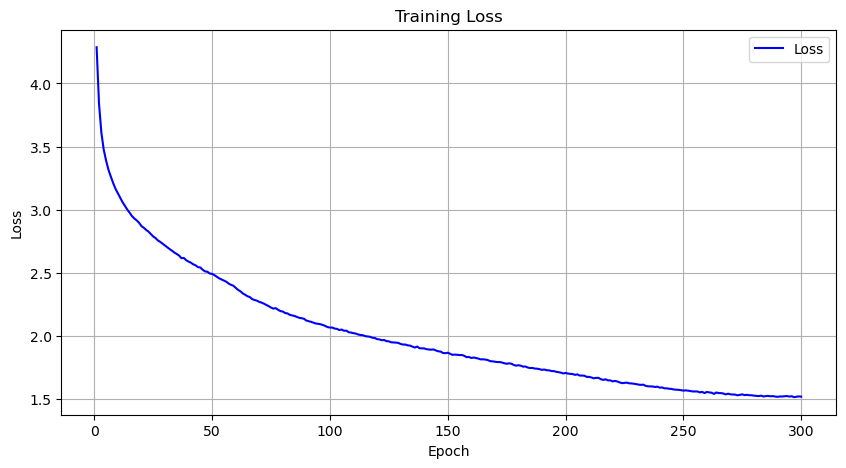

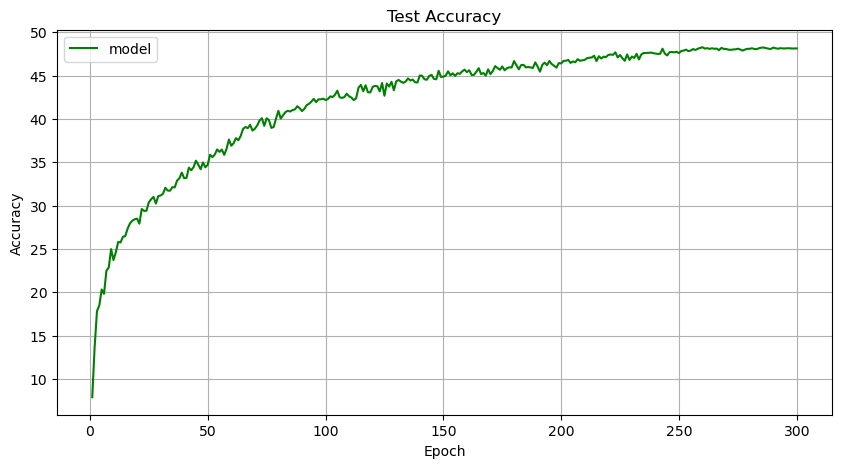

In [10]:
train(
    student_base,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    save_path=student_base_save_path,
)

response based kd

In [11]:
student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False

).to("cuda")
student_kd_save_path = "save_model/cifar-10/vit_student_kd"
student_kd_load_path = f"{student_kd_save_path}/best_model.pt"


In [12]:
train_kd(
    student_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.2,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='response',
    save_path=student_kd_save_path,
    load_path_teacher=teacher_load_path,
)

Epoch 1/300, Loss: 3.719824821472168
Current Learning Rate: 0.000999972584682756
accuracy: 7.5%
Test Accuracy: 10.15%
max_test_accuracy : 10.15
Epoch 2/300, Loss: 3.2396968475341796
Current Learning Rate: 0.0009998903417374227
accuracy: 13.75%
Test Accuracy: 16.04%
max_test_accuracy : 16.04
Epoch 3/300, Loss: 2.9893883827209473
Current Learning Rate: 0.0009997532801828658
accuracy: 18.75%
Test Accuracy: 19.22%
max_test_accuracy : 19.22
Epoch 4/300, Loss: 2.8281010719299315
Current Learning Rate: 0.0009995614150494292
accuracy: 22.5%
Test Accuracy: 21.89%
max_test_accuracy : 21.89
Epoch 5/300, Loss: 2.726190511703491
Current Learning Rate: 0.000999314767377287
accuracy: 12.5%
Test Accuracy: 23.66%
max_test_accuracy : 23.66
Epoch 6/300, Loss: 2.633137767791748
Current Learning Rate: 0.0009990133642141358
accuracy: 28.75%
Test Accuracy: 25.76%
max_test_accuracy : 25.76
Epoch 7/300, Loss: 2.5559495540618897
Current Learning Rate: 0.000998657238612229
accuracy: 23.75%
Test Accuracy: 26.02%


feature based kd

In [ ]:
feature_student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True

).to("cuda")
feature_student_kd_save_path = "save_model/cifar-10/vit_student_feature_kd"
feature_student_kd_load_path = f"{feature_student_kd_save_path}/best_model.pt"

teacher_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True
).to("cuda")

In [ ]:
train_kd(
    feature_student_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.2,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='feature',
    save_path=student_kd_save_path,
    load_path_teacher=teacher_load_path,
)

combined kd


In [ ]:
student_combined_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True
).to("cuda")

student_combined_kd_save_path = "save_model/cifar-10/vit_student_combined_kd"

train_kd(
    student_combined_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.15,
    beta=0.15,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='combined',
    save_path=student_combined_kd_save_path,
    load_path_teacher=teacher_load_path,
)